In [6]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import json as json
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

d:\Personal Projects\Social_Ecological_Info_Cooperation\Code\My_Simulations


In [2]:
from helper_functions import strategy_to_label
from helper_functions import all_information_modes

In [3]:
WSLS = [1,0,0,1]
GT = [1,0,0,0]
ALLC = [1,1,1,1]
TFT = [1,0,1,0]
ALLD = [0,0,0,0]
ReverseGT = [0,0,0,1]

strategy_to_label(np.array([0,0,0,0]))

TypeError: strategy_to_label() missing 1 required positional argument: 'mode'

In [34]:
df = pd.read_excel("../Data/Basin_of_Attraction/complete/complete_dis__0.995_m_6.5_unique_strategies_and_frequency.xlsx")


def convert_final_point_to_numpy_array(final_point, number_of_states):

    flat = np.fromstring(final_point.replace('[', ' ').replace(']', ' '), sep=' ', dtype=float)
    array = flat.reshape(2, number_of_states)
    return array




#next, we need to label the final points



def process_and_parase_basin_of_attraction_data(df):
    #first, we need to convert the final point from string to numpy array
    df["final_point"] = df["final_point"].apply(lambda x: convert_final_point_to_numpy_array(x, 4))
    
    #next, we need to label the final points
    df["final_point_label_agent_1"] = df["final_point"].apply(lambda x: strategy_to_label(x[0,:], 'complete'))

    df = df.groupby("final_point_label_agent_1")["frequency"].sum()

    return df

df = process_and_parase_basin_of_attraction_data(df)
df


final_point_label_agent_1
ALL C      87.0
ALL D       0.2
Inv. GT     3.0
WSLS        2.4
other       7.4
Name: frequency, dtype: float64

In [43]:
import numpy as np
import pandas as pd

discount_factors = [0.955, 0.965, 0.975, 0.985, 0.995]
strategies = ['ALL C', 'WSLS', 'Inv. GT', 'ALL D']

rng = np.random.default_rng(42)

rows = []


list_for_dicts = [] 


for d in discount_factors:

    df = pd.read_excel(f"../Data/Basin_of_Attraction/complete/complete_dis__{d}_m_6.5_unique_strategies_and_frequency.xlsx")
    df = process_and_parase_basin_of_attraction_data(df)

    for s in strategies:
        if s in df.index:
            freq = df[s]
        else:
            freq = 0
        
        list_for_dicts.append({"discount_factor": d, "strategy": s, "frequency": freq})

df_for_ploting = pd.DataFrame(list_for_dicts)

df_for_ploting

df_pivot = df_for_ploting.pivot_table(index="discount_factor",
            columns="strategy",
            values="frequency")

df_pivot

strategy,ALL C,ALL D,Inv. GT,WSLS
discount_factor,,,,
0.955,0.6,72.6,0.0,13.8
0.965,32.0,56.8,0.0,5.8
0.975,46.6,38.4,0.2,6.6
0.985,66.6,16.4,4.0,4.4
0.995,87.0,0.2,3.0,2.4


strategy         ALL C  ALL D  Inv. GT  WSLS
discount_factor                             
0.955              0.6   72.6      0.0  13.8
0.965             32.0   56.8      0.0   5.8
0.975             46.6   38.4      0.2   6.6
0.985             66.6   16.4      4.0   4.4
0.995             87.0    0.2      3.0   2.4


KeyError: 'ALLC'

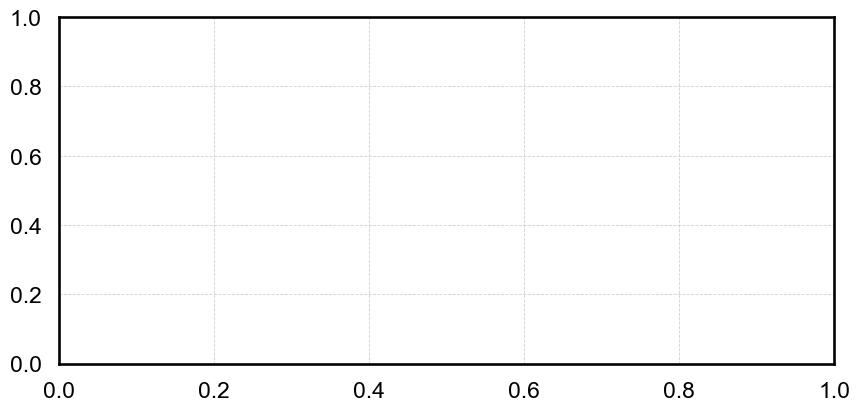

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # --------------------------
# # 1. Generate random dataset
# # --------------------------
# discount_factors = [0.955, 0.965, 0.975, 0.985, 0.995]
# strategies = ['ALLC', 'WSLS', 'Inv. GT', 'ALLD']

# rng = np.random.default_rng(42)
# rows = []
# for d in discount_factors:
#     for s in strategies:
#         abundance = rng.integers(5, 40)
#         rows.append({"discount_factor": d, "strategy": s, "abundance": abundance})
# df = pd.DataFrame(rows)

# df = df_for_ploting

# pivot = (df.pivot_table(index="discount_factor",
#                         columns="strategy",
#                         values="abundance",
#                         aggfunc="sum")
#            .reindex(columns=strategies)
#            .fillna(0))


pivot = df_pivot

print(pivot)

# --------------------------
# 2. Define palette
# --------------------------
strategy_colors_barplot = {
    'ALL C':   '#6ad46d',   # bright green
    'WSLS':   '#38c172',   # medium green
    'Inv. GT':'#e66d6d',   # warm red
    'ALL D':   '#ff4d4d',   # strong red
}

# --------------------------
# 3. Thesis-style plot
# --------------------------
sns.set_theme(context="talk", style="whitegrid")
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "axes.edgecolor":  "black",
    "grid.color":      "#d0d0d0",
    "grid.linestyle":  "--",
    "grid.linewidth":  0.6,
    "xtick.color":     "black",
    "ytick.color":     "black",
    "text.color":      "black",
    "axes.labelcolor": "black",
})

fig, ax = plt.subplots(figsize=(10, 4.5))
x = np.arange(len(pivot.index))
bottom = np.zeros(len(pivot))
bar_width = 0.7

for s in strategies:
    ax.bar(
        x, pivot[s].values, bottom=bottom,
        label=s, color=strategy_colors_barplot[s],
        edgecolor="black", linewidth=0.5,
        width=bar_width
    )
    bottom += pivot[s].values

# X axis
ax.set_xticks(x)
ax.set_xticklabels([f"{d:.3f}" for d in pivot.index], rotation=0)
ax.set_xlabel("Discount factor")
ax.set_ylabel("Abundance (%)")

# Fix Y axis 0–100
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 20))

# Legend outside (clean, white background)
leg = ax.legend(
    title="Strategy", loc="center left", bbox_to_anchor=(1.02, 0.5),
    frameon=True, facecolor="white", edgecolor="black"
)
leg.get_title().set_color("black")

sns.despine()   # remove top/right spines
plt.tight_layout()
plt.title("Only Social Information")
plt.show()
